In [ ]:
#Initialising Hyper Parameters

#Uncomment one of the two below lines. For some reason, on some computers the first one works, while on others the second.
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import adam
import tensorflow as tf

import numpy as np
import keras

  #for consistency of random numbers and our images

noise_dim = 100  # input dimension of random vector - the vector that goes into the generator

batch_size = 64   #How many images do we want to include in each batch
steps_per_epoch = 2500  #How many steps do we want to take per iteration of our training set (number of batches)
epochs = 60      #How many iterations of our training set do we want to do.

#change the below values to the dimensions of your image. The channels number refers to the number of colors
img_rows, img_cols, channels = 128, 128, 4

#These are the recommended values for the optimizer
optimizer = Adam(0.0002, 0.5)

In [ ]:
from keras.initializers import RandomNormal
from keras.layers import Dense, Conv2D, Conv2DTranspose, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential


def create_generator_cgan():
    generator = Sequential()
    
    d = 32
    generator.add(Dense(d*d*256, kernel_initializer=RandomNormal(0, 0.02), input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))     #We are going to use the same leaky relu activation function as the FCGAN.
    
    generator.add(Reshape((d, d, 256)))
    
    generator.add(Conv2DTranspose(128, (4, 4), strides=2, padding='same', kernel_initializer=RandomNormal(0, 0.02)))
    generator.add(LeakyReLU(0.2))

    generator.add(Conv2DTranspose(128, (4, 4), strides=2, padding='same', kernel_initializer=RandomNormal(0, 0.02)))
    generator.add(LeakyReLU(0.2))
    

    
    generator.add(Conv2D(channels, (3, 3), padding='same', activation='tanh', kernel_initializer=RandomNormal(0, 0.02)))  #Remember that the final activation has to be tanh, since pixel values go from -1 to 1
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)    #The loss doesn't change when you use convolutional layers
    return generator

In [ ]:
from keras.initializers import RandomNormal
from keras.layers import Dense, Conv2D, Flatten, Reshape, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential

def create_discriminator_cgan():
    discriminator = Sequential()
    
    discriminator.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=RandomNormal(0, 0.02), input_shape=(img_cols, img_rows, channels)))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Conv2D(128, (3, 3), strides=2, padding='same', kernel_initializer=RandomNormal(0, 0.02)))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Conv2D(128, (3, 3), strides=2, padding='same', kernel_initializer=RandomNormal(0, 0.02)))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Conv2D(256, (3, 3), strides=2, padding='same', kernel_initializer=RandomNormal(0, 0.02)))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Flatten())
    discriminator.add(Dropout(0.4))
    discriminator.add(Dense(1, activation='sigmoid', input_shape=(img_cols, img_rows, channels)))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)  #Again, the loss doesn't change when creating a DCGAN.
    return discriminator

In [ ]:
from keras.layers import Input
from keras.models import Model

discriminator = create_discriminator_cgan()
generator = create_generator_cgan()

discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
import numpy as np
arr=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/asad data/5000 masks_array/numpy_array.npy')

In [ ]:
import tensorflow as tf
x_cat=tf.keras.utils.to_categorical(arr, num_classes=None, dtype='float32')

In [ ]:
import matplotlib.pyplot as plt
def show_images(noise, size_fig):
    generated_images = generator.predict(noise)   #Create the images from the GAN.
    generated_images=np.argmax(generated_images,axis=3)
    plt.figure(figsize=size_fig)
    
    for i, image in enumerate(generated_images):
        plt.subplot(size_fig[0], size_fig[1], i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)))    #If the image is grayscale, as in our case, then we will reshape the output in the following way.
                                                                            #Also, we set the coloring to grayscale so that it doesn't look like it came out of an infrared camera :)
        else:
            plt.imshow(image.reshape((img_rows, img_cols)))
        plt.axis('off')
    
    plt.tight_layout()   #Tight layout so that all of the generated images form a nice grid
    plt.show()

In [ ]:
import tensorflow as tf
x_cat=tf.keras.utils.to_categorical(arr, num_classes=None, dtype='float32')

In [ ]:
path_discrim='/content/drive/MyDrive/brain tumor segmentation/GANS/asad data/saved models /60 epochs with batch size 64/discrimator/'
path_generator='/content/drive/MyDrive/brain tumor segmentation/GANS/asad data/saved models /60 epochs with batch size 64/generator/'


Epoch: 1 	 Discriminator Loss: 0.2011317014694214 		 Generator Loss: 4.781459808349609


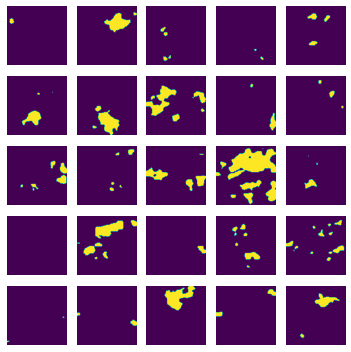

Epoch: 2 	 Discriminator Loss: 0.17600764334201813 		 Generator Loss: 5.365351676940918


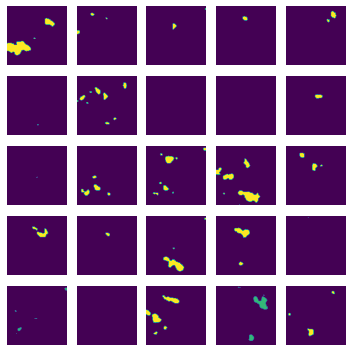

Epoch: 3 	 Discriminator Loss: 0.16991697251796722 		 Generator Loss: 5.9121856689453125


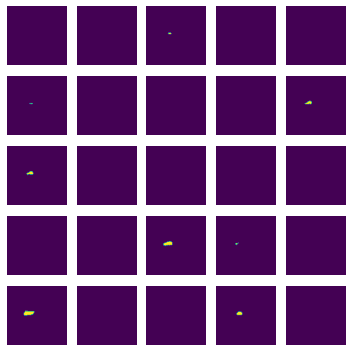

Epoch: 4 	 Discriminator Loss: 0.17668049037456512 		 Generator Loss: 5.047863960266113


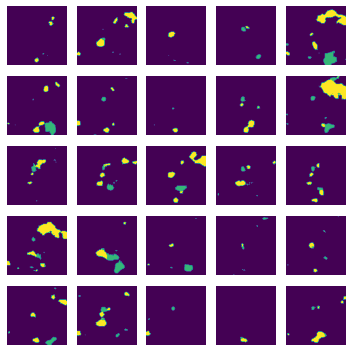

Epoch: 5 	 Discriminator Loss: 0.17028959095478058 		 Generator Loss: 6.049862861633301


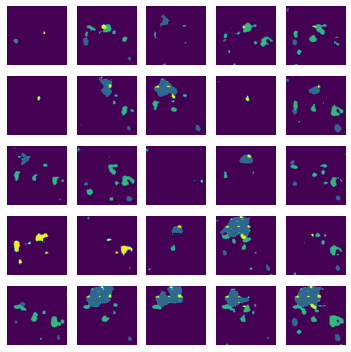

Epoch: 6 	 Discriminator Loss: 0.23119153082370758 		 Generator Loss: 3.2712645530700684


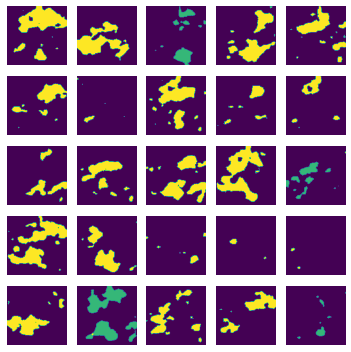

Epoch: 7 	 Discriminator Loss: 0.1765805333852768 		 Generator Loss: 5.068577766418457


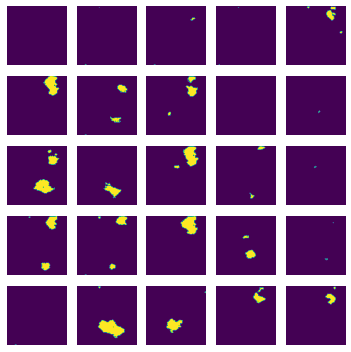

Epoch: 8 	 Discriminator Loss: 0.16788716614246368 		 Generator Loss: 51.51194763183594


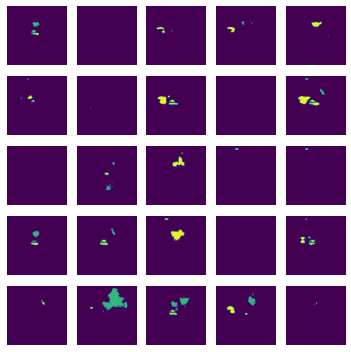

Epoch: 9 	 Discriminator Loss: 0.1758030652999878 		 Generator Loss: 5.521583557128906


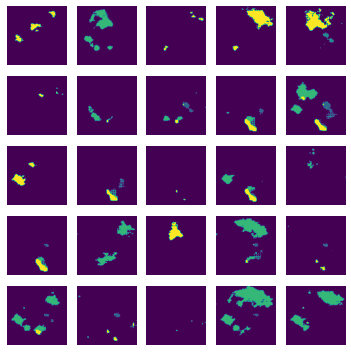

Epoch: 10 	 Discriminator Loss: 0.168046772480011 		 Generator Loss: 6.188936233520508


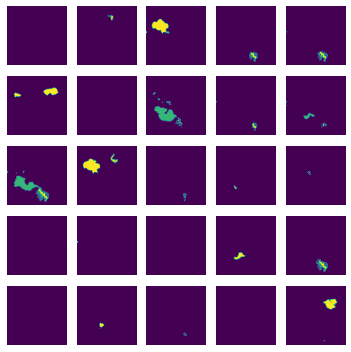

Epoch: 11 	 Discriminator Loss: 0.1909548044204712 		 Generator Loss: 3.7858352661132812


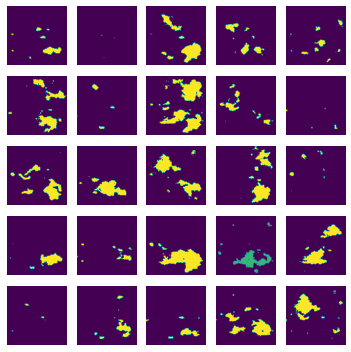

Epoch: 12 	 Discriminator Loss: 0.1666727364063263 		 Generator Loss: 6.49527645111084


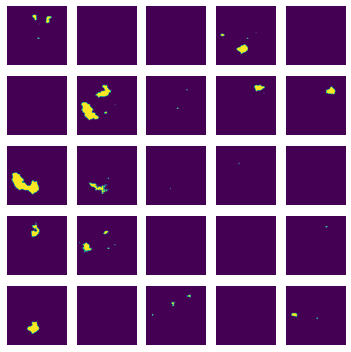

Epoch: 13 	 Discriminator Loss: 0.16608335077762604 		 Generator Loss: 6.856191635131836


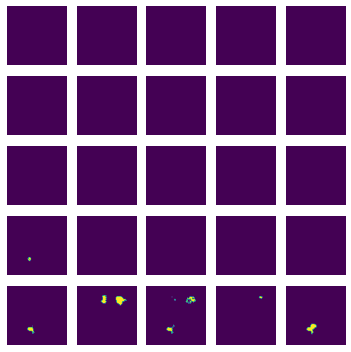

Epoch: 14 	 Discriminator Loss: 0.17693457007408142 		 Generator Loss: 5.23564338684082


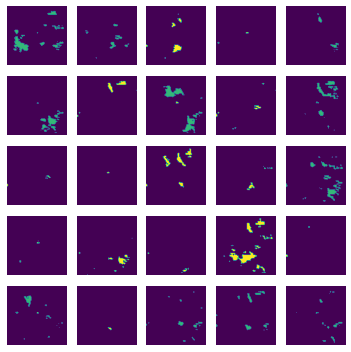

Epoch: 15 	 Discriminator Loss: 0.17005038261413574 		 Generator Loss: 5.7016096115112305


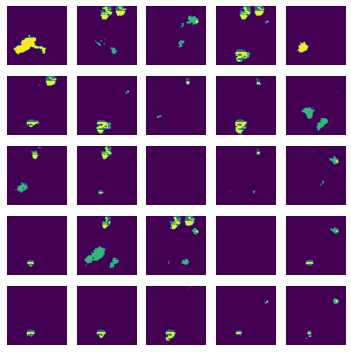

Epoch: 16 	 Discriminator Loss: 0.16960254311561584 		 Generator Loss: 5.8605194091796875


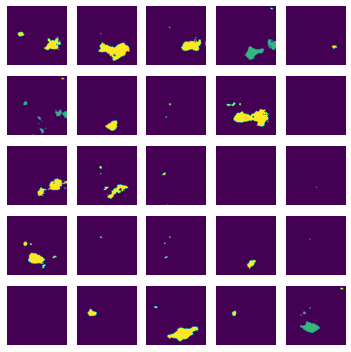

Epoch: 17 	 Discriminator Loss: 0.16764956712722778 		 Generator Loss: 6.204906463623047


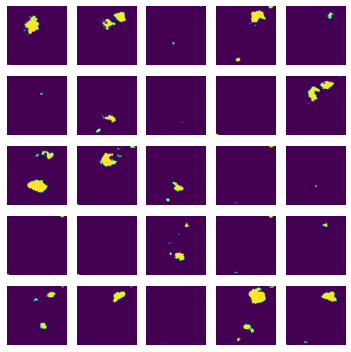

Epoch: 18 	 Discriminator Loss: 0.17361736297607422 		 Generator Loss: 5.516045570373535


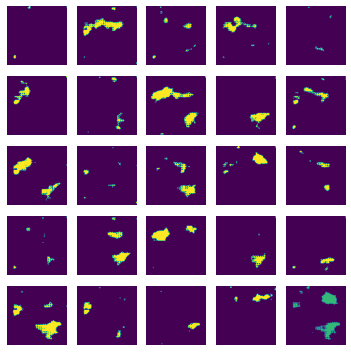

Epoch: 19 	 Discriminator Loss: 0.19920827448368073 		 Generator Loss: 4.225512504577637


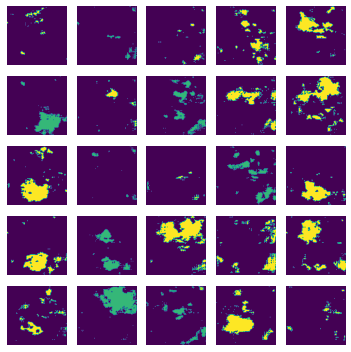

Epoch: 20 	 Discriminator Loss: 0.16648320853710175 		 Generator Loss: 6.65511417388916


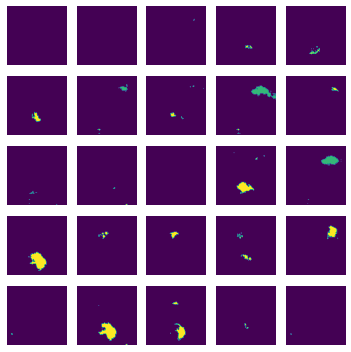

Epoch: 21 	 Discriminator Loss: 0.21705877780914307 		 Generator Loss: 3.8464863300323486


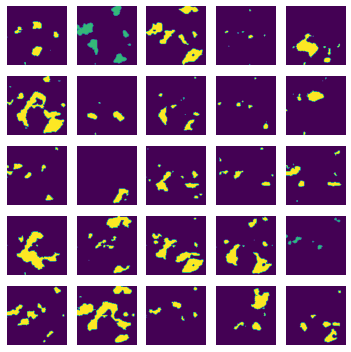

Epoch: 22 	 Discriminator Loss: 0.16844941675662994 		 Generator Loss: 6.0803422927856445


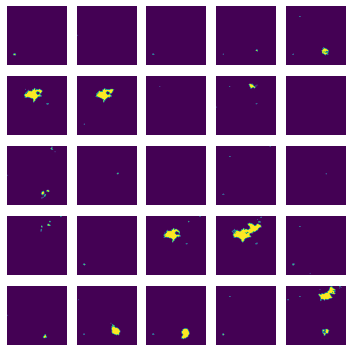

Epoch: 23 	 Discriminator Loss: 0.1700197011232376 		 Generator Loss: 6.459050178527832


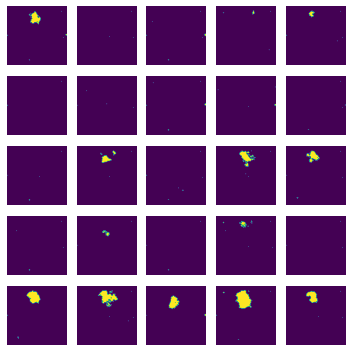

Epoch: 24 	 Discriminator Loss: 0.1709577441215515 		 Generator Loss: 5.911975860595703


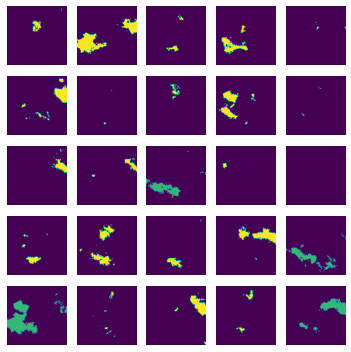

Epoch: 25 	 Discriminator Loss: 0.17052145302295685 		 Generator Loss: 6.3594841957092285


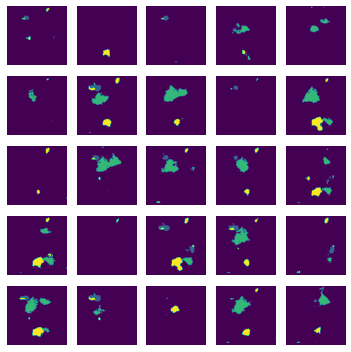

Epoch: 26 	 Discriminator Loss: 0.16747112572193146 		 Generator Loss: 6.014163017272949


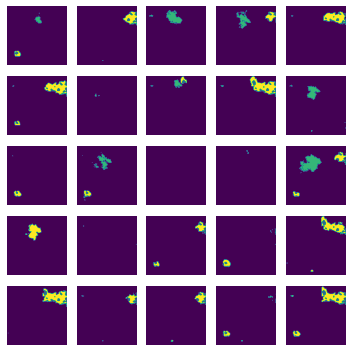

Epoch: 27 	 Discriminator Loss: 0.16821596026420593 		 Generator Loss: 6.254071235656738


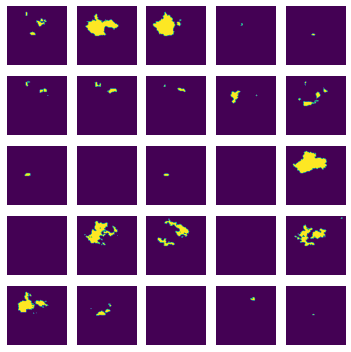

Epoch: 28 	 Discriminator Loss: 0.16666144132614136 		 Generator Loss: 6.8820013999938965


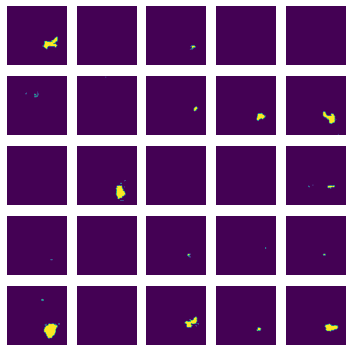

Epoch: 29 	 Discriminator Loss: 0.1672537475824356 		 Generator Loss: 5.945152282714844


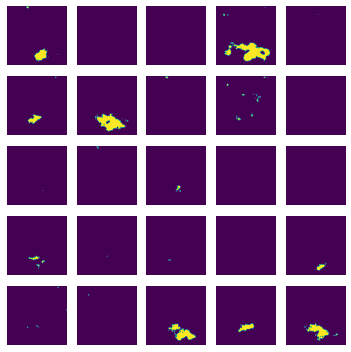

Epoch: 30 	 Discriminator Loss: 0.16702665388584137 		 Generator Loss: 6.576389312744141


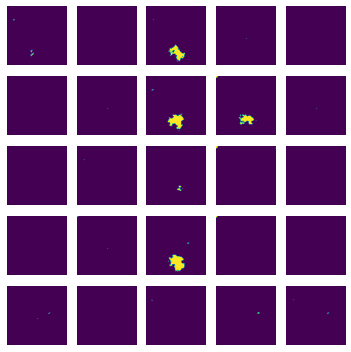

Epoch: 31 	 Discriminator Loss: 0.16592299938201904 		 Generator Loss: 6.842170238494873


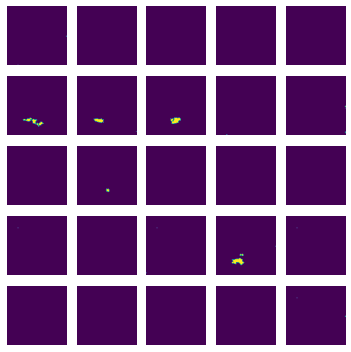

Epoch: 32 	 Discriminator Loss: 0.1712290495634079 		 Generator Loss: 5.864631652832031


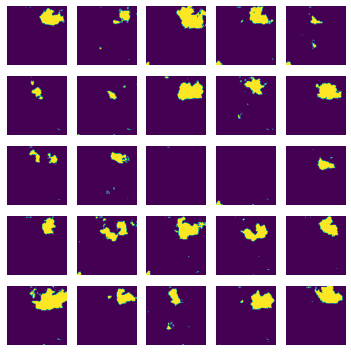

Epoch: 33 	 Discriminator Loss: 0.17413578927516937 		 Generator Loss: 6.170279502868652


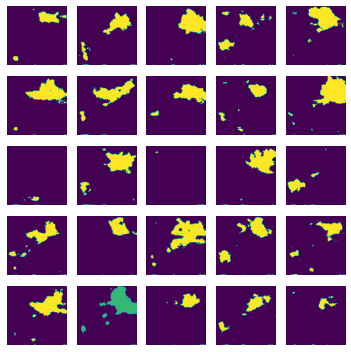

Epoch: 34 	 Discriminator Loss: 0.16681131720542908 		 Generator Loss: 8.107723236083984


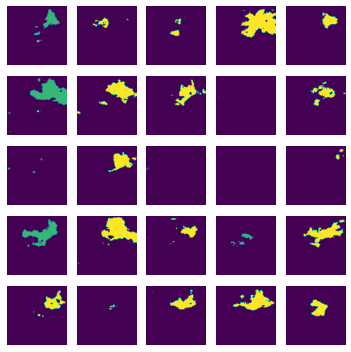

Epoch: 35 	 Discriminator Loss: 0.16625817120075226 		 Generator Loss: 7.21273946762085


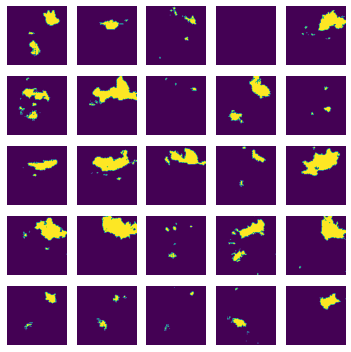

Epoch: 36 	 Discriminator Loss: 0.16509418189525604 		 Generator Loss: 7.14530611038208


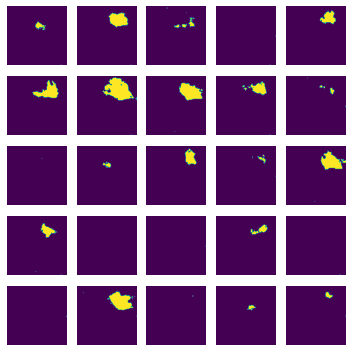

Epoch: 37 	 Discriminator Loss: 0.16721753776073456 		 Generator Loss: 7.3231964111328125


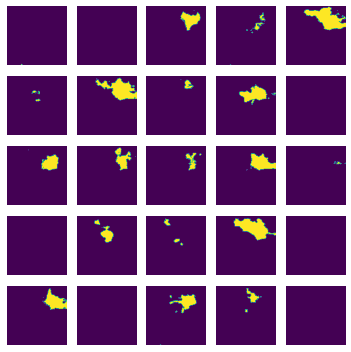

Epoch: 38 	 Discriminator Loss: 0.17830683290958405 		 Generator Loss: 6.802822589874268


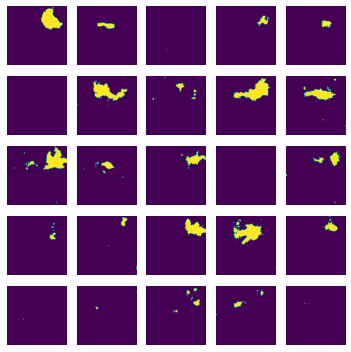

Epoch: 39 	 Discriminator Loss: 0.16580308973789215 		 Generator Loss: 7.057764530181885


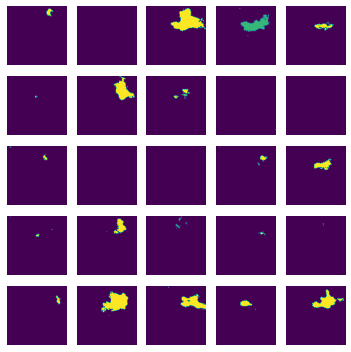

Epoch: 40 	 Discriminator Loss: 0.189137801527977 		 Generator Loss: 5.2386698722839355


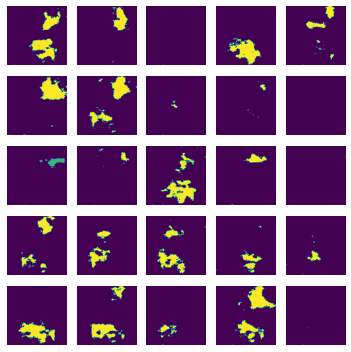

Epoch: 41 	 Discriminator Loss: 0.1687757968902588 		 Generator Loss: 5.997419357299805


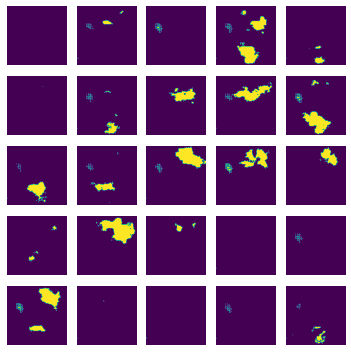

Epoch: 42 	 Discriminator Loss: 0.1669521927833557 		 Generator Loss: 6.392836570739746


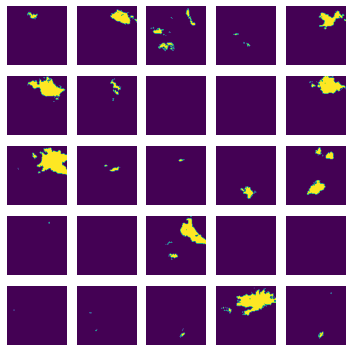

Epoch: 43 	 Discriminator Loss: 0.18221178650856018 		 Generator Loss: 5.811918258666992


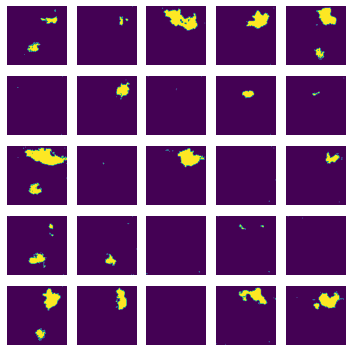

Epoch: 44 	 Discriminator Loss: 0.1697777509689331 		 Generator Loss: 5.508322715759277


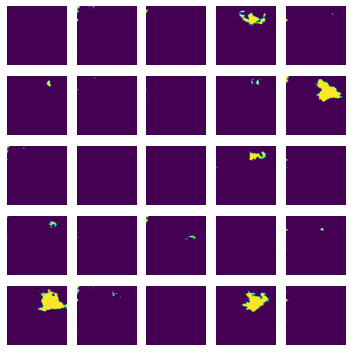

Epoch: 45 	 Discriminator Loss: 0.16697530448436737 		 Generator Loss: 6.891221523284912


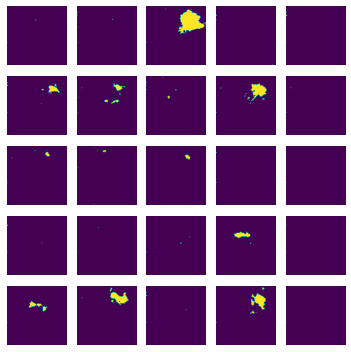

Epoch: 46 	 Discriminator Loss: 0.17541557550430298 		 Generator Loss: 5.381577014923096


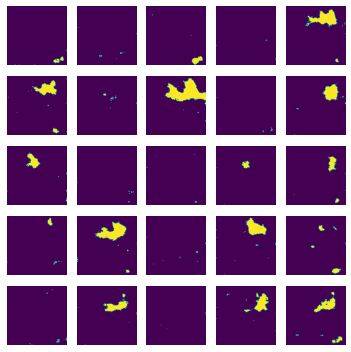

Epoch: 47 	 Discriminator Loss: 0.1661529541015625 		 Generator Loss: 7.813653945922852


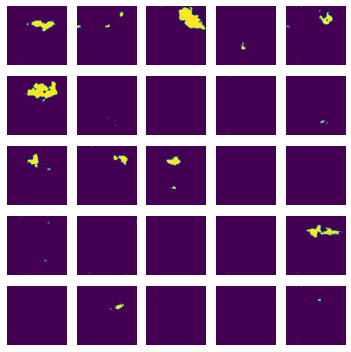

Epoch: 48 	 Discriminator Loss: 0.16550464928150177 		 Generator Loss: 7.169975757598877


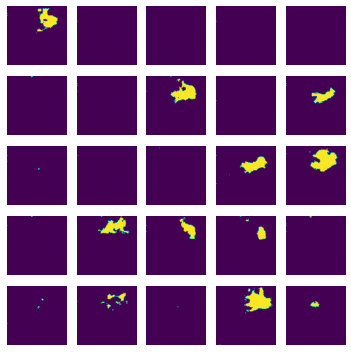

Epoch: 49 	 Discriminator Loss: 0.16707585752010345 		 Generator Loss: 6.432714462280273


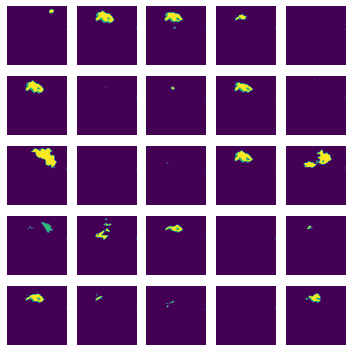

Epoch: 50 	 Discriminator Loss: 0.16638697683811188 		 Generator Loss: 6.785152435302734


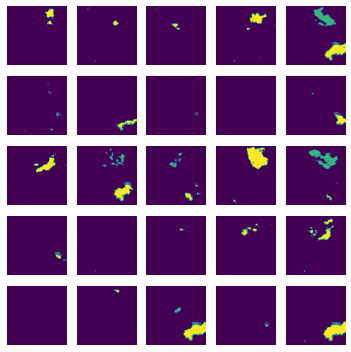

Epoch: 51 	 Discriminator Loss: 0.16526181995868683 		 Generator Loss: 7.200517654418945


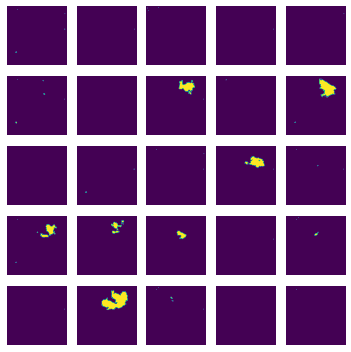

Epoch: 52 	 Discriminator Loss: 0.17080990970134735 		 Generator Loss: 6.000115871429443


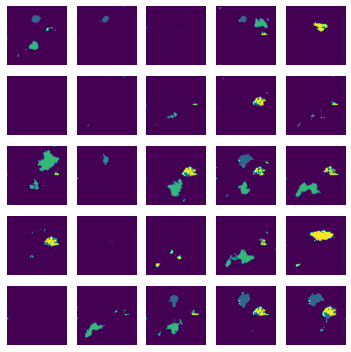

Epoch: 53 	 Discriminator Loss: 0.16402839124202728 		 Generator Loss: 8.5664644241333


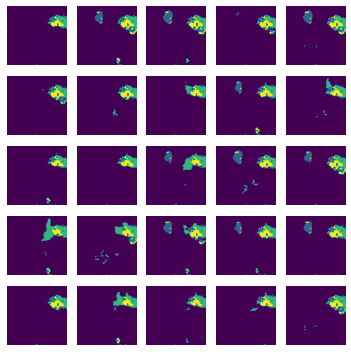

Epoch: 54 	 Discriminator Loss: 0.16431455314159393 		 Generator Loss: 6.975860118865967


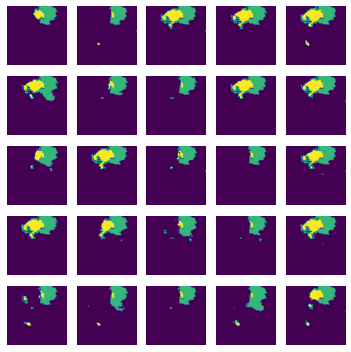

Epoch: 55 	 Discriminator Loss: 0.17198006808757782 		 Generator Loss: 5.847146034240723


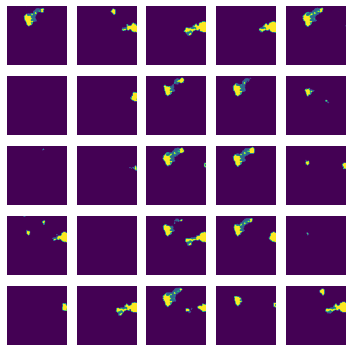

Epoch: 56 	 Discriminator Loss: 0.16749559342861176 		 Generator Loss: 6.553460121154785


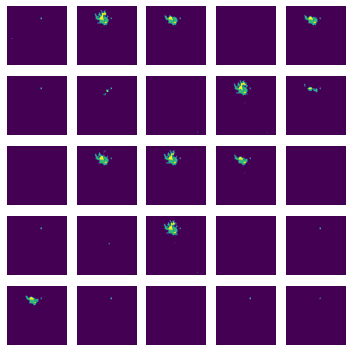

Epoch: 57 	 Discriminator Loss: 0.1634807586669922 		 Generator Loss: 8.516403198242188


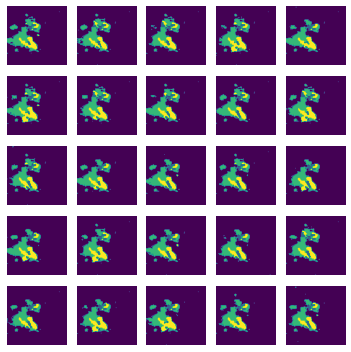

Epoch: 58 	 Discriminator Loss: 0.16291795670986176 		 Generator Loss: 9.119417190551758


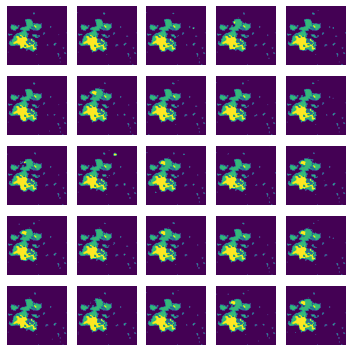

Epoch: 59 	 Discriminator Loss: 0.25625213980674744 		 Generator Loss: 3.501400947570801


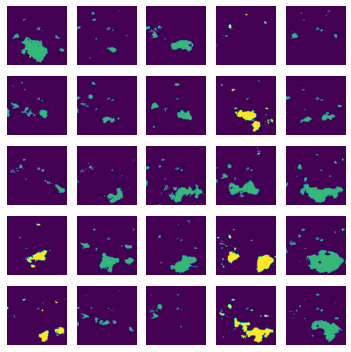

Epoch: 60 	 Discriminator Loss: 0.16553549468517303 		 Generator Loss: 7.883676528930664


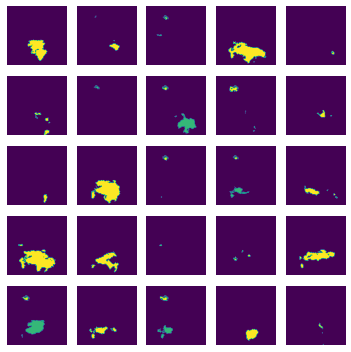

INFO:tensorflow:Assets written to: /content/drive/MyDrive/brain tumor segmentation/GANS/asad data/saved models /60 epochs with batch size 64/generator/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/brain tumor segmentation/GANS/asad data/saved models /60 epochs with batch size 64/discrimator/assets


In [10]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        real_x = x_cat[np.random.randint(0, x_cat.shape[0], size=batch_size)]###check this line  and its value in the first dimensions
        #print(real_x.shape)
        #print(fake_x.shape)
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch + 1} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')
    noise = np.random.normal(0, 1, size=(25, noise_dim))
    show_images(noise, (5, 5))

##saving model    
generator.save(path_generator)

discriminator.save(path_discrim)

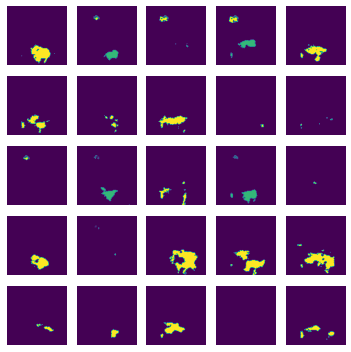

In [23]:
noise = np.random.normal(0, 1, size=(25, noise_dim))
show_images(noise, (5, 5))

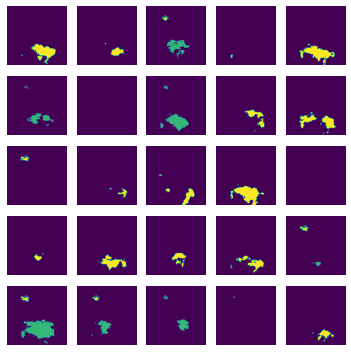

In [24]:
noise = np.random.normal(0, 1, size=(25, noise_dim))
show_images(noise, (5, 5))